In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
import math

CLAUSES = [
    [1, 1, 0],  # Clause 1: (x0 ∨ x1 ∨ ¬x2)
]

def create_oracle(var_qubits, clause_ancillas, oracle_qubit):
    qc = QuantumCircuit(var_qubits, clause_ancillas, oracle_qubit)
    
    for index, clause in enumerate(CLAUSES):
        qc.x([var_qubits[i] for i, val in enumerate(clause) if val == 1])
        qc.mcx(
            var_qubits,
            clause_ancillas[index]
        )
    
    # Clause 1: (x0 ∨ x1 ∨ ¬x2)
    # qc.x([var_qubits[0], var_qubits[1]])
    # qc.mcx([var_qubits[0], var_qubits[1], var_qubits[2]], clause_ancillas[0])
    # qc.x([var_qubits[0], var_qubits[1]])
    # qc.x(clause_ancillas[0])
    # qc.barrier()

    
    # Clause 2: (¬x0 ∨ x1 ∨ x2)
    # qc.x([var_qubits[1], var_qubits[2]])
    # qc.mcx([var_qubits[0], var_qubits[1], var_qubits[2]], clause_ancillas[1])
    # qc.x([var_qubits[1], var_qubits[2]])
    # qc.x(clause_ancillas[1])
    
    qc.h(oracle_qubit)
    qc.mcx(clause_ancillas, oracle_qubit)
    qc.h(oracle_qubit)
    qc.barrier()
    
    # Uncompute clause ancillas
    # Uncompute clause 2
    # qc.x(clause_ancillas[1])
    # qc.x([var_qubits[1], var_qubits[2]])
    # qc.mcx([var_qubits[0], var_qubits[1], var_qubits[2]], clause_ancillas[1])
    # qc.x([var_qubits[1], var_qubits[2]])
    
    # Uncompute clause 1
    # qc.x(clause_ancillas[0])
    # qc.x([var_qubits[0], var_qubits[1]])
    # qc.mcx([var_qubits[0], var_qubits[1], var_qubits[2]], clause_ancillas[0])
    # qc.x([var_qubits[0], var_qubits[1]])
    # qc.barrier()
    
    return qc

# def create_diffusion(var_qubits):
#     qc = QuantumCircuit(var_qubits)
#     qc.h(var_qubits)
#     qc.x(var_qubits)
#     qc.h(var_qubits[-1])
#     qc.mcx(var_qubits[:-1], var_qubits[-1])
#     qc.h(var_qubits[-1])
#     qc.x(var_qubits)
#     qc.h(var_qubits)

#     return qc

var_qubits = QuantumRegister(3, name='v')
# clause_ancillas = QuantumRegister(2, name='c')
clause_ancillas = QuantumRegister(1, name='c')
oracle_qubit = QuantumRegister(1, name='o')
cr = ClassicalRegister(3, name='cr')

grover_circuit = QuantumCircuit(var_qubits, clause_ancillas, oracle_qubit, cr)

grover_circuit.h(var_qubits)
grover_circuit.x(oracle_qubit)
grover_circuit.h(oracle_qubit)

oracle = create_oracle(var_qubits, clause_ancillas, oracle_qubit)
grover_operator = GroverOperator(oracle)

optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(CLAUSES / 2**grover_op.num_qubits)))
)

# Measure the variables
grover_circuit.measure(var_qubits, cr)

grover_circuit.draw("mpl")

NameError: name 'grover_op' is not defined

Counts: {'101': 78, '111': 76, '011': 89, '100': 456, '110': 76, '001': 70, '000': 89, '010': 90}


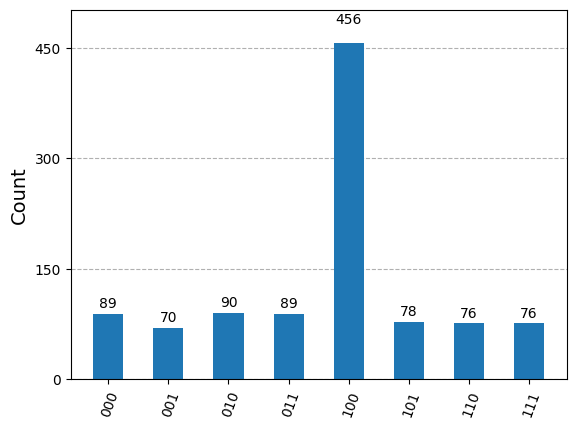

In [129]:

grover_circuit.compose(diffusion, inplace=True)
# Simulate the circuit
simulator = AerSimulator()

result = simulator.run(grover_circuit).result()

counts = result.get_counts()

print("Counts:", counts)

plot_histogram(counts)